In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('esen.csv')

In [3]:
df = df[["acc","roc"]]

In [4]:
df

,acc,roc
0,0.715032,0.66445
1,0.715032,0.66845
2,0.715032,0.66610
3,0.724136,0.64010
4,0.722159,0.67315
5,0.709661,0.63370
6,0.709661,0.59445
7,0.709661,0.55885
8,0.711727,0.62025
9,0.711624,0.65655


<Axes: xlabel='acc', ylabel='roc'>

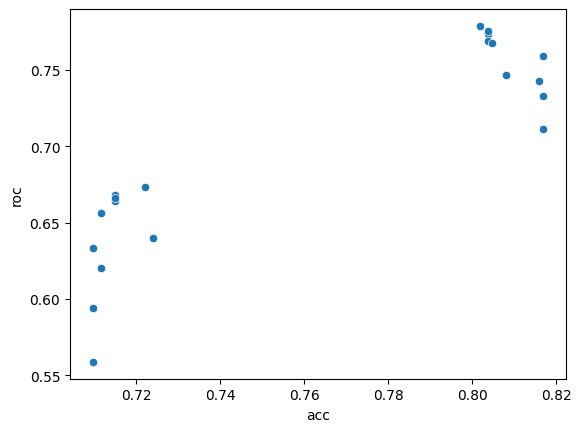

In [5]:
sns.scatterplot(data=df, x="acc", y="roc")

### These data were analyzed using Spearman’s correlation coefficient, a statistic sensitive to monotonic correlation between the samples.

In [6]:
from scipy import stats
res = stats.spearmanr(df['acc'],df['roc'])
res.statistic

0.7337501975307227

###The value of this statistic tends to be high (close to 1) for samples with a strongly positive ordinal correlation, low (close to -1) for samples with a strongly negative ordinal correlation, and small in magnitude (close to zero) for samples with weak ordinal correlation

<Axes: xlabel='acc', ylabel='roc'>

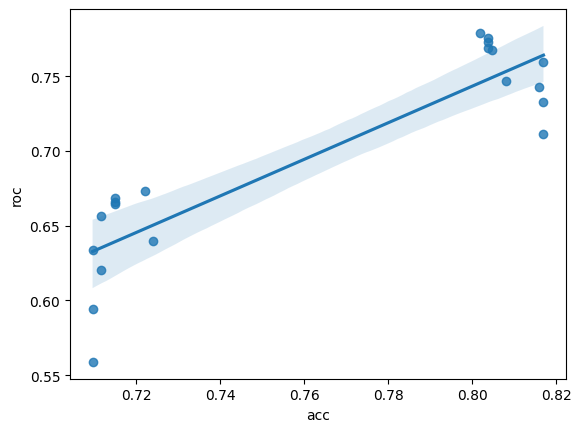

In [8]:
sns.regplot(data=df, x="acc", y="roc")


###The value of this statistic tends to be high (close to 1) for samples with a strongly positive ordinal correlation, low (close to -1) for samples with a strongly negative ordinal correlation, and small in magnitude (close to zero) for samples with weak ordinal correlation.
###The test is performed by comparing the observed value of the statistic against the null distribution: the distribution of statistic values derived under the null hypothesis that Accuracy and Roc Auc scores are independent.

###For this test, the statistic can be transformed such that the null distribution for large samples is Student’s t distribution with df.shape[0] - 2 degrees of freedom.

###The comparison is quantified by the p-value: the proportion of values in the null distribution as extreme or more extreme than the observed value of the statistic. In a two-sided test in which the statistic is positive, elements of the null distribution greater than the transformed statistic and elements of the null distribution less than the negative of the observed statistic are both considered “more extreme”.

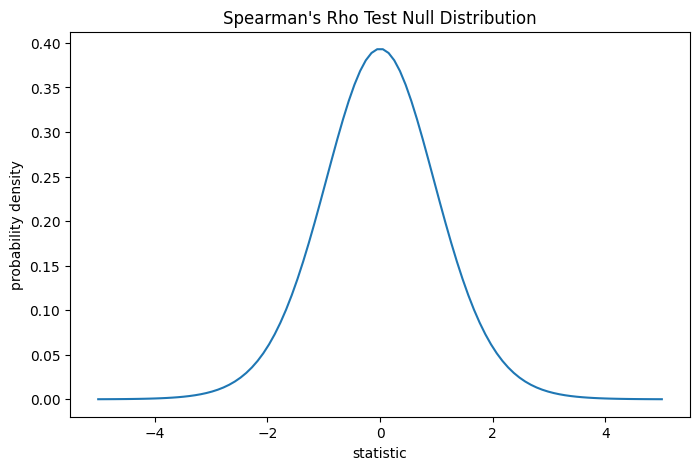

In [21]:
import matplotlib.pyplot as plt
dof = len(df['acc'])-2  # len(df['acc']) == len(df['roc'])
dist = stats.t(df=dof)
t_vals = np.linspace(-5, 5, 100)
pdf = dist.pdf(t_vals)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):  # we'll reuse this
    ax.plot(t_vals, pdf)
    ax.set_title("Spearman's Rho Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

###the t-distribution provides an asymptotic approximation of the null distribution; it is only accurate for samples with many observations. For small samples, it may be more appropriate to perform a permutation test: Under the null hypothesis that Accuracy and Roc-Auc are independent, each of the Roc-Auc scores were equally likely to have been observed with any of the accuracy scores. Therefore, we can form an exact null distribution by calculating the statistic under each possible pairing of elements between x and y.

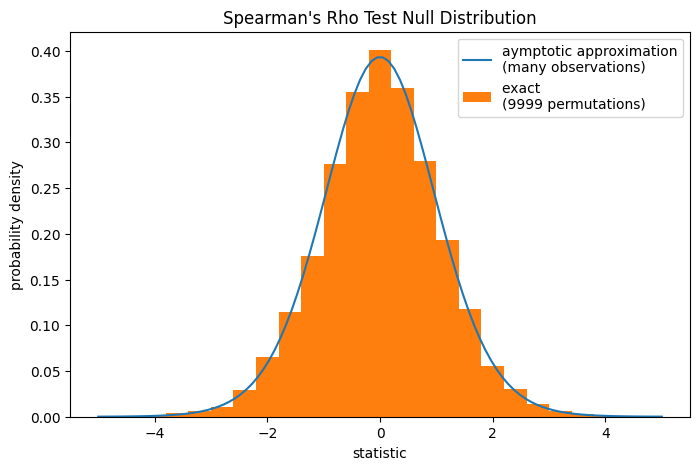

In [19]:
def statistic(x):  # explore all possible pairings by permuting `x`
    rs = stats.spearmanr(x, df['roc']).statistic  # ignore pvalue
    transformed = rs * np.sqrt(dof / ((rs+1.0)*(1.0-rs)))
    return transformed
ref = stats.permutation_test((df['acc'],), statistic, alternative='greater',
                             permutation_type='pairings')
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
ax.hist(ref.null_distribution, np.linspace(-5, 5, 26),
        density=True)
ax.legend(['aymptotic approximation\n(many observations)',
           f'exact \n({len(ref.null_distribution)} permutations)'])
plt.show()


In [20]:
ref.pvalue

0.0001

### p-value very small (typically < 5% ) -> we reject the Null Hypothesis and conclude the existence of a nonlinear correlation between Accuracy and Roc Auc